In [1]:
!unzip lab8_partial.zip

Archive:  lab8_partial.zip
  inflating: data/3d-points/x_test.txt  
  inflating: data/3d-points/x_train.txt  
  inflating: data/3d-points/y_test.txt  
  inflating: data/3d-points/y_train.txt  
  inflating: data/MNIST/test_images.txt  
  inflating: data/MNIST/test_labels.txt  
  inflating: data/MNIST/train_images.txt  
  inflating: data/MNIST/train_labels.txt  
  inflating: lab8_partial.ipynb      
  inflating: lab8_partial.py         


In [13]:
import numpy as np
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt


In [14]:
from mpl_toolkits import mplot3d

def plot3d_data_and_decision_function(X, y, W, b): 
    ax = plt.axes(projection='3d') # create x,y 

    xx, yy = np.meshgrid(range(10), range(10)) # calculate corresponding z # [x, y, z] * [W[0], W[1], W[2]] + b = 0 

    zz = (-W[0] * xx - W[1] * yy - b) / W[2] 

    ax.plot_surface(xx, yy, zz, alpha=0.5) 
    ax.scatter3D(X[y == -1, 0], X[y == -1, 1], X[y == -1, 2], 'b'); 
    ax.scatter3D(X[y == 1, 0], X[y == 1, 1], X[y == 1, 2], 'r'); 
    plt.show()

In [15]:
# incarcarea datelor de antrenare
X = np.loadtxt('./data/3d-points/x_train.txt')
y = np.loadtxt('./data/3d-points/y_train.txt', 'int8') 
 
# incarcarea datelor de testare
X_test = np.loadtxt('./data/3d-points/x_test.txt')
y_test = np.loadtxt('./data/3d-points/y_test.txt', 'int8') 
 
 
X2 = np.loadtxt('./data/MNIST/train_images.txt')
y2 = np.loadtxt('./data/MNIST/train_labels.txt', 'int8')
 
X2_test = np.loadtxt('./data/MNIST/test_images.txt')
y2_test = np.loadtxt('./data/MNIST/test_labels.txt', 'int8')

0.881 0.905
[-1.64921166 -1.84272361 -1.97507964] [21.2] 11


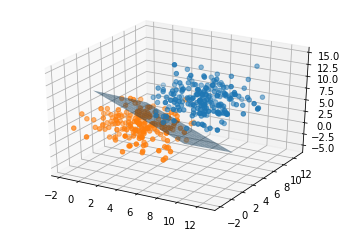

In [16]:
from sklearn.linear_model import Perceptron
perceptron_model = Perceptron(tol=1e-5, eta0= 0.1, max_iter=20)

perceptron_model.fit(X, y)
train_acc = perceptron_model.score(X, y)
test_acc = perceptron_model.score(X_test, y_test)

print(train_acc, test_acc)

ponderi = perceptron_model.coef_[0]
bias = perceptron_model.intercept_
epoci = perceptron_model.n_iter_

print(ponderi, bias, epoci)

plot3d_data_and_decision_function(X_test, y_test, ponderi, bias)

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X2 = scaler.fit_transform(X2)

X2_test = scaler.fit_transform(X2_test)

from sklearn.neural_network import MLPClassifier

In [18]:
mlp_classifier_model = MLPClassifier(activation='tanh',hidden_layer_sizes=(1),
            learning_rate_init=0.01, momentum=0, max_iter=200)
mlp_classifier_model.fit(X2, y2)
predict = mlp_classifier_model.predict(X2_test)

from sklearn.metrics import accuracy_score

acc = accuracy_score(predict, y2_test)
print(acc) 

0.212


In [19]:
# b

mlp_classifier_model = MLPClassifier(activation='tanh', hidden_layer_sizes=(10),
                        learning_rate_init=0.01, momentum=0, max_iter=200)
mlp_classifier_model.fit(X2, y2)
predict = mlp_classifier_model.predict(X2_test)

from sklearn.metrics import accuracy_score

acc = accuracy_score(predict, y2_test)
print(acc) 

0.824


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [20]:
#c

mlp_classifier_model = MLPClassifier(activation='tanh',hidden_layer_sizes=(10),
            learning_rate_init=0.00001, momentum=0, max_iter=200)
mlp_classifier_model.fit(X2, y2)
predict = mlp_classifier_model.predict(X2_test)

from sklearn.metrics import accuracy_score

acc = accuracy_score(predict, y2_test)
print(acc)

0.356


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [21]:
# d

mlp_classifier_model = MLPClassifier(activation='tanh',hidden_layer_sizes=(10),
            learning_rate_init=10, momentum=0, max_iter=200)
mlp_classifier_model.fit(X2, y2)
predict = mlp_classifier_model.predict(X2_test)

from sklearn.metrics import accuracy_score

acc = accuracy_score(predict, y2_test)
print(acc) 

0.394


In [24]:
#f
clf = MLPClassifier(activation='tanh', hidden_layer_sizes=(10, 10),
                    learning_rate_init=0.01, momentum=0,
                    max_iter=2000)
clf.fit(X2, y2)
print(clf.score(X2, y2))
print(clf.score(X2_test, y2_test))
#overfitting

0.999
0.784


In [29]:
#g
clf = MLPClassifier(activation='relu', hidden_layer_sizes=(10, 10),
                    learning_rate_init=0.01, momentum=0,
                    max_iter=2000)
clf.fit(X2, y2)
print(clf.score(X2, y2))
print(clf.score(X2_test, y2_test))
#overfitting

1.0
0.83


In [30]:
#h
clf = MLPClassifier(activation='relu', hidden_layer_sizes=(100, 100),
                    learning_rate_init=0.01, momentum=0,
                    max_iter=2000)
clf.fit(X2, y2)
print(clf.score(X2, y2))
print(clf.score(X2_test, y2_test))
#overfitting, dar e ok pentru ca e 90%

1.0
0.91


In [31]:
#i
clf = MLPClassifier(activation='relu', hidden_layer_sizes=(100, 100),
                    learning_rate_init=0.01, momentum=0.9,
                    max_iter=2000)
clf.fit(X2, y2)
print(clf.score(X2, y2))
print(clf.score(X2_test, y2_test))

1.0
0.892


In [32]:
#j
clf = MLPClassifier(activation='relu', hidden_layer_sizes=(100, 100),
                    learning_rate_init=0.01, momentum=0.9,
                    max_iter=2000, alpha=0.005)
clf.fit(X2, y2)
print(clf.score(X2, y2))
print(clf.score(X2_test, y2_test))


1.0
0.904
